In [1]:
# Import
import pandas as pd
import numpy as np

In [2]:
# Create a set of random (latitudes and longtitudes)
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)
# Add the lats and lngs to list
coordinates = list(lat_lngs)

In [3]:
# Use the citipy module to determine city based on lats and lngs
from citipy import citipy
cities = []

# Identify the nearest city for each lats and lngs combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
# City count
len(cities)

762

In [4]:
# # Import the requests 
import requests

# # Import the API key
from config import weather_api_key

# Create an URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
boston_data=city_weather.json()

In [5]:
# Import the datetime module 
from datetime import datetime

# # Get the date from the JSON file.
# date = boston_data["dt"]
# # Convert the UTC date to a date format
# datetime.utcfromtimestamp(date)
#datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
        
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
  
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1 
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]

        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        city_weather_description=city_weather["weather"][0]["description"]
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date,
                          "Description":city_weather_description})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jiddah
City not found. Skipping...
Processing Record 2 of Set 1 | korla
Processing Record 3 of Set 1 | geraldton
Processing Record 4 of Set 1 | walvis bay
Processing Record 5 of Set 1 | san jeronimo
Processing Record 6 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | mahalapye
Processing Record 14 of Set 1 | ejura
Processing Record 15 of Set 1 | fairbanks
Processing Record 16 of Set 1 | bontang
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | hamilton
Processing Record 19 of Set 1 | kuytun
Processing Record 20 of Set 1 | yantal
Processing Record 21 of Set 1 | sa

Processing Record 36 of Set 4 | turinskaya sloboda
Processing Record 37 of Set 4 | richards bay
Processing Record 38 of Set 4 | pundaguitan
Processing Record 39 of Set 4 | vao
Processing Record 40 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 41 of Set 4 | canandaigua
Processing Record 42 of Set 4 | nikolskoye
Processing Record 43 of Set 4 | mitu
Processing Record 44 of Set 4 | iaciara
Processing Record 45 of Set 4 | pochutla
Processing Record 46 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 47 of Set 4 | kadykchan
City not found. Skipping...
Processing Record 48 of Set 4 | bajil
Processing Record 49 of Set 4 | antalaha
Processing Record 50 of Set 4 | bouake
Processing Record 1 of Set 5 | merauke
Processing Record 2 of Set 5 | saint george
Processing Record 3 of Set 5 | port macquarie
Processing Record 4 of Set 5 | kavieng
Processing Record 5 of Set 5 | karangampel
Processing Record 6 of Set 5 | ghanzi
Processing Record 7 of Set 5 | avera
Process

Processing Record 28 of Set 8 | beboto
Processing Record 29 of Set 8 | lukovetskiy
Processing Record 30 of Set 8 | terrace
Processing Record 31 of Set 8 | las guacamayas
Processing Record 32 of Set 8 | capreol
Processing Record 33 of Set 8 | najran
Processing Record 34 of Set 8 | mbini
Processing Record 35 of Set 8 | constitucion
Processing Record 36 of Set 8 | san cristobal
Processing Record 37 of Set 8 | salekhard
Processing Record 38 of Set 8 | tofield
Processing Record 39 of Set 8 | haines junction
Processing Record 40 of Set 8 | mitsamiouli
Processing Record 41 of Set 8 | matam
Processing Record 42 of Set 8 | emba
Processing Record 43 of Set 8 | villazon
Processing Record 44 of Set 8 | kihei
Processing Record 45 of Set 8 | college
Processing Record 46 of Set 8 | aksarka
Processing Record 47 of Set 8 | tiznit
Processing Record 48 of Set 8 | waipawa
Processing Record 49 of Set 8 | port hardy
Processing Record 50 of Set 8 | porto murtinho
Processing Record 1 of Set 9 | khovu-aksy
Pro

Processing Record 19 of Set 12 | ilebo
Processing Record 20 of Set 12 | bull savanna
Processing Record 21 of Set 12 | batemans bay
Processing Record 22 of Set 12 | nioro
Processing Record 23 of Set 12 | at-bashi
Processing Record 24 of Set 12 | serebryanyy bor
Processing Record 25 of Set 12 | odweyne
Processing Record 26 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 27 of Set 12 | ambodifototra
City not found. Skipping...
Processing Record 28 of Set 12 | huilong
Processing Record 29 of Set 12 | arman
Processing Record 30 of Set 12 | gezing
Processing Record 31 of Set 12 | road town
Processing Record 32 of Set 12 | rocky mount
Processing Record 33 of Set 12 | remontnoye
Processing Record 34 of Set 12 | carahue
Processing Record 35 of Set 12 | georgiyevskoye
Processing Record 36 of Set 12 | sao joao da barra
Processing Record 37 of Set 12 | kachug
Processing Record 38 of Set 12 | mitchell
Processing Record 39 of Set 12 | lagos
Processing Record 40 of Set 12 | carol

Processing Record 50 of Set 15 | moyo
Processing Record 1 of Set 16 | pietarsaari
Processing Record 2 of Set 16 | morogoro
Processing Record 3 of Set 16 | gravdal
Processing Record 4 of Set 16 | pisco
Processing Record 5 of Set 16 | ust-kamchatsk
City not found. Skipping...
Processing Record 6 of Set 16 | port shepstone
Processing Record 7 of Set 16 | anshun
Processing Record 8 of Set 16 | saint cloud
Processing Record 9 of Set 16 | copiapo
Processing Record 10 of Set 16 | rio grande
Processing Record 11 of Set 16 | lincoln
Processing Record 12 of Set 16 | tuy hoa
-----------------------------
Data Retrieval Complete      
-----------------------------


In [7]:
#Reorder the columns 
city_data_df = pd.DataFrame(city_data)
new_city_data_df=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed","Description"]

# Convert the array of dictionaries to a Pandas DataFrame
city_data_df=city_data_df[new_city_data_df]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Description
0,Korla,CN,2021-08-05 20:59:04,41.7597,86.1469,81.23,27,94,17.02,overcast clouds
1,Geraldton,AU,2021-08-05 20:59:04,-28.7667,114.6000,43.21,87,0,4.61,clear sky
2,Walvis Bay,NA,2021-08-05 20:59:05,-22.9575,14.5053,55.09,87,4,2.30,clear sky
3,San Jeronimo,PE,2021-08-05 20:59:05,-11.9472,-75.2829,57.90,43,70,9.78,broken clouds
4,Mataura,NZ,2021-08-05 20:59:05,-46.1927,168.8643,39.47,94,24,1.92,few clouds


In [10]:
# Export
city_data_df.to_csv("weather_data.csv", index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

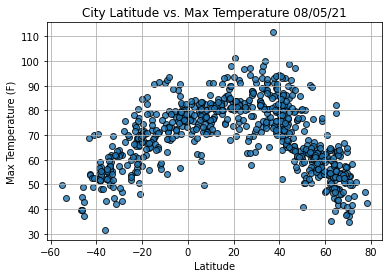

In [15]:
# Import
import time
import matplotlib.pyplot as plt

# Create scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("results/Fig1.png")
plt.show()

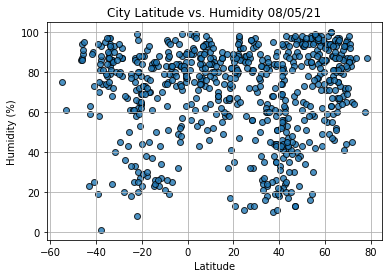

In [16]:
# Create the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("results/Fig2.png")
plt.show()

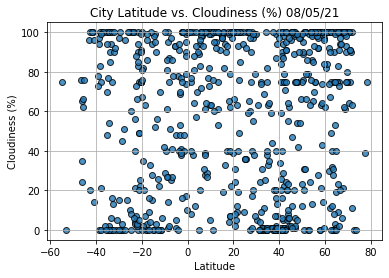

In [17]:
# Create the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("results/Fig3.png")
plt.show()

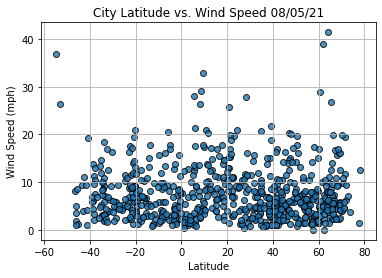

In [18]:
# Create scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("results/Fig4.png")
plt.show()

In [19]:
# Import 
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather dataand plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
# index13 = city_data_df.loc[13]
# index13

In [20]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

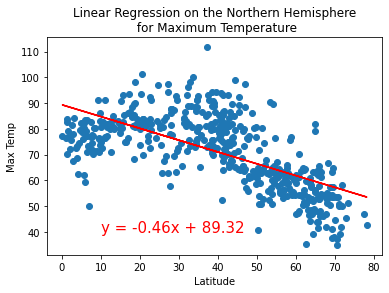

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Maximum Temperature', 'Max Temp',(10,40))


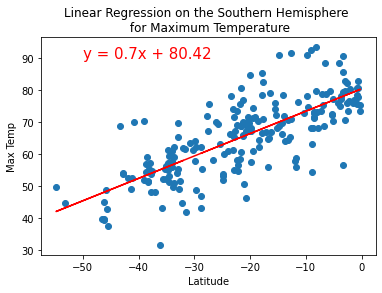

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))


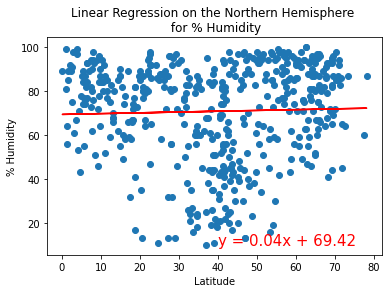

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

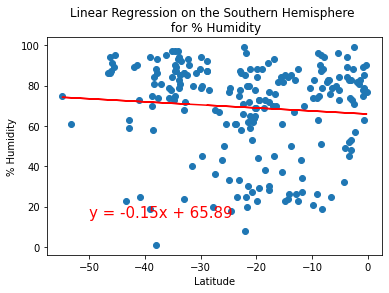

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

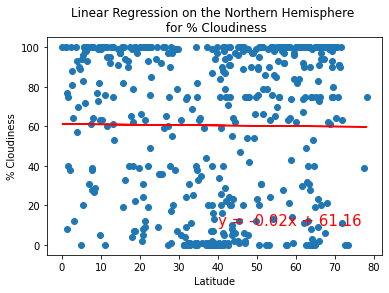

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

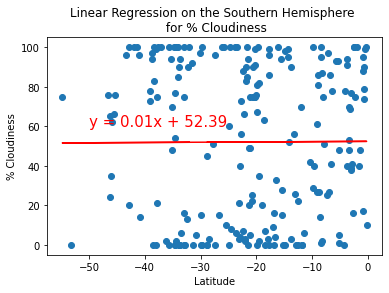

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

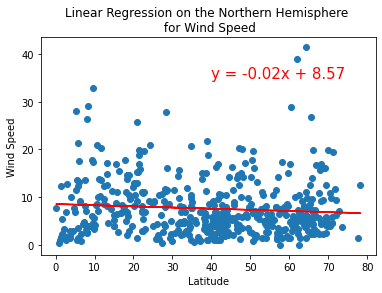

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

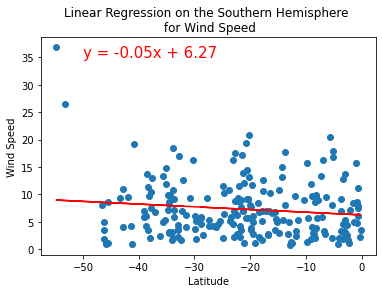

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))